# Pareto models

We consider the two-parameter Pareto model, written as follows:


$$
 \bigg\{  Pa\big( \theta_{1}, \theta_{2}  \big) ; \theta_{1}, \theta_{2} > 0 \bigg\} 
$$

This Pareto distribution is a continuous distribution with support $x \in [ \theta_{2}, \infty [$ and with PDF given by

$$
f_{\theta_{1}, \theta_{2} }(x) = \frac{\theta_{1} \theta_{2}^{\theta_{1}} }{x^{\theta_{1} +1 }} \ I_{[ \theta_{2}, \infty [}(x)  
$$


If we set $\theta_{2} = 1$, then it reduces to the one-parameter Pareto distribution, which is a continuous distribution on $[ 1, \infty [$, with PDF given by

$$
f_{\theta_{1
} }(x) = \frac{\theta_{1} }{x^{\theta_{1}+1 }} \ I_{[ 1, \infty [}(x)  
$$

# Plotting

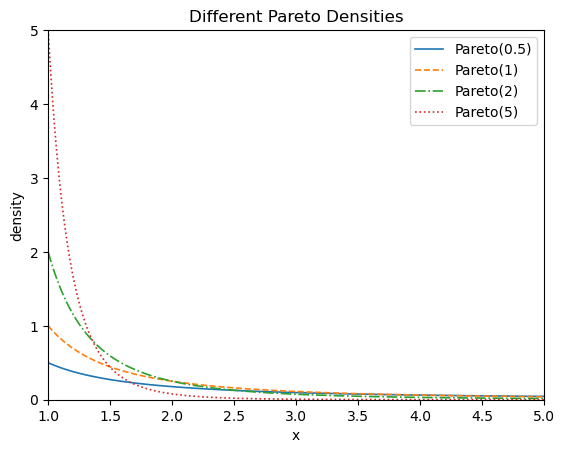

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Define a function that returns a Pareto density
def dpareto(x, theta1, theta2=1):
    pareto = (theta1 * (theta2**theta1)) / (x**(theta1 + 1))
    return pareto

# 2. Create plot
x_lower, x_upper = 1, 5
x_values = np.linspace(x_lower, x_upper, 1000)

plt.plot(x_values, dpareto(x_values, theta1=0.5, theta2=1), label='Pareto(0.5)', linestyle='solid', linewidth=1.2)
plt.plot(x_values, dpareto(x_values, theta1=1, theta2=1), label='Pareto(1)', linestyle='dashed', linewidth=1.2)
plt.plot(x_values, dpareto(x_values, theta1=2, theta2=1), label='Pareto(2)', linestyle='dashdot', linewidth=1.2)
plt.plot(x_values, dpareto(x_values, theta1=5, theta2=1), label='Pareto(5)', linestyle='dotted', linewidth=1.2)

plt.title('Different Pareto Densities')
plt.xlabel('x')
plt.ylabel('density')
plt.legend()
plt.xlim(1, 5)
plt.ylim(0, 5)
plt.show()

## Estimation

In [15]:
# 3. Function to generate random one-parameter Pareto realizations
def rpareto(n, theta1, theta2=1):
    data = ((1 / (1 - np.random.rand(n))) ** (1 / theta1))
    return data

# 4. Create an artificial dataset of size n = 40
np.random.seed(2024)
xi = rpareto(40, 4, 1)

# 5. Estimation of the parameter using MLE and MOM

MoM_estimator = np.mean(xi) / (np.mean(xi) - 1)
print("MoM Estimator:", MoM_estimator)

MLE_estimator = 1 / np.mean(np.log(xi))
print("MLE Estimator:", MLE_estimator)

MoM Estimator: 4.7041297591504145
MLE Estimator: 4.554886947691036


In [16]:
import pandas as pd
from scipy.stats import norm

# Bootstrap parameters
num_bootstraps = 10000
bootstrap_mom = np.zeros(num_bootstraps)
bootstrap_mle = np.zeros(num_bootstraps)
np.random.seed(2024)

# Bootstrap estimation loop
for i in range(num_bootstraps):
    resample = np.random.choice(xi, size=len(xi), replace=True)
    bootstrap_mom[i] = np.mean(resample) / (np.mean(resample) - 1)
    bootstrap_mle[i] = 1 / np.mean(np.log(resample))

# Mean and standard error of the estimators
mean_mom = np.mean(bootstrap_mom)
mean_mle = np.mean(bootstrap_mle)
standard_error_mom = np.std(bootstrap_mom)
standard_error_mle = np.std(bootstrap_mle)

results = np.array([[mean_mle, standard_error_mle], [mean_mom, standard_error_mom]])
results = pd.DataFrame(results, index=['mle', 'mom'], columns=['mean', 'se'])
print(results)

# Asymptotic confidence intervals
CI_mle = [mean_mle - norm.ppf(1 - 0.05/2) * standard_error_mle,
          mean_mle + norm.ppf(1 - 0.05/2) * standard_error_mle]

CI_mom = [mean_mom - norm.ppf(1 - 0.05/2) * standard_error_mom,
          mean_mom + norm.ppf(1 - 0.05/2) * standard_error_mom]

CI = pd.DataFrame([CI_mle, CI_mom], index=['mle', 'mom'], columns=['lower bound', 'upper bound'])
print(CI)


         mean        sd
mle  4.637122  0.636883
mom  4.803370  0.630459
     lower bound  upper bound
mle     3.388854     5.885390
mom     3.567692     6.039047
